<div style="background-color:lightblue">
<h1><center>
    The Data Science Labs on <br/>
     Differential and Integral Calculus  <br/>
   <small>by Alden Bradford and Mireille Boutin </small>
</center></h1>
    </div>

<h1><center>
    Laboratory 5<br/>
    Introduction to Micropython<br/>
    Self-Directed Investigation
    <p style="font-size: 16px"> Last Updated on February 7, 2022</p>
</center></h1>

<h2 style="color:orange;"><left>0. Content </left></h2>

## Mathematics ##
- Difference schemes versus interpolation

## Programming Skills ##
- Data cleaning
- the While loop
- Boolean masks

## Embedded Systems ##
- Microcontroller programming
- Time-based signaling

<h3 style="background-color:lightblue"><left> Copy the file `student_info.py` into the folder you are working in, then run this cell to put your name and email into this document.</left></h3>

In [1]:
from student_info import show_info
show_info()

ModuleNotFoundError: No module named 'student_info'

# The sensor

Today we will start out with an ultrasonic distance sensor, called the SR04. It has a simple interface using only two pins. It sends out a very high-frequency sound (at a much higher frequency than anyone can hear) and listens for an echo. We can use the time delay between when the "chirp" happens and when we hear the echo to figure out how far away something is.

To use this sensor, you will need:
1. A Raspberry Pi Pico
2. A level shifter
3. An SR04 distance sensor
4. A breadboard
5. at least a dozen jumper wires of several colors.
6. A micro USB cable

Start by gathering the parts!

## Wire it up
Insert the pico, level shifter, and SR04 into the bread board so that the jumper wires you have will reach between them. You will also want the micro USB port to be accessible, and you will need the SR04 to be pointed outward.

Then, use jumper wires to make the following connections:

**Pico**| **Level shifter**
-|-
GND | GND (low voltage side)
GND | LV3
GND | LV4
3V3(OUT) | LV
VBUS | HV
(any GP pin) | LV1
(any other GP pin) | LV2

<br>

**Level shifter** | **SR04**
-|-
GND (high voltage side) | GND
VCC | HV
TRIG | HV1
ECHO | HV2

The level shifter and SR04 are labeled with their pins. Remember that you can look up the names of the pins on the Raspberry Pi Pico by consulting its datasheet.

**Before you plug the Raspberry Pi Pico into your computer** (which will supply power to your circuit), get your circuit checked by an instructor. If you have it wired incorrectly, you could damage the computer's USB port.

## What is the level shifter doing?
The Raspberry Pi Pico runs all its circuits at 3.3 volts, while the SR04 runs at 5 volts. Luckily, we do have 5 volts available for it (the USB standard includes a 5 volt pin) so we can drive the ultrasonic sensor as long as the Pico is connected to a computer. The level shifter is in charge of translating between the voltage levels, which is why it has a low voltage side connected to 3V3, and a high voltage side connected to VBUS (which refers to the USB cable). We only need to do level shifting to two pins, and it is good practice to connect pins you are not using to ground.

## The software
Once you have it wired up, open the file `ultrasonic.py` in Thonny. There are a few things I would like to point out to you in that file.
1. We use a `while` loop. A while loop is just like a `for` loop, repeating everything in the body of the loop. Instead of taking values from a list or a range, it just keeps going until its argument is `False`. By saying `while True`, we are telling it to do everything in the body of the loop, over and over, forever (or until we stop it manually). In order to stop this script, you will need to hit the "Stop" button in Thonny.
2. The Raspberry Pi Pico runs a different version of Python called Micropython. Micropython is designed specifically for microcontrollers. It does not have many of the modules you are used to, like `numpy`, since the Pico does not have enough memory or processing power to make good use of them. Instead, it has libraries for interfacing with hardware, like the `machine` library we will use to control the pins on the Pico. Also, the `time` library in Micropython supports millisecond and microsecond `sleep` functions, which can count out much more precise units of time than you can in normal Python.
3. Near the start we define two variables `trig` and `echo`. Each of those takes an integer, which refers to the pin you are using to connect with the SR04. Change the script so that `trig` corresponds to the GP port where you connected LV1, and `echo` with the GP port where you connected LV2.

As we work through this lab, you will learn what each part of this code does. Before we get into it, go ahead and run the script and see for yourself what it is doing. Move something in front of the sensor, see if you can make the numbers change.

Now that you have a feel for what this script does, let's bring some of the data in here. Make a new file called `initial measurement.txt` and save it in your lab 5 directory. Copy and paste the output from Thonny into that file and save it.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
measurement = np.loadtxt('initial measurement.txt', dtype=int)
measurement

Here we have loaded the file using `numpy`. It loaded it as a 2-dimensional array, with rows and columns. We can ask it what shape the measurement is (how many rows, and how many columns):

In [ ]:
measurement.shape

We see that it has read two columns. The first column has the time (in milliseconds) when each measurement was taken, after the scrept started. The second column tells us how long it was (in microseconds) between the chirp and the echo.

Let's pull these apart using multidimensional slicing. This is just like normal slicing, but we can give more than one argument to the slice.

In [ ]:
timestamp = measurement[:, 0]

Here we are saying "give me every row, and the first column. Assign that to the variable `timestamp`." You do a slice to get the second column.

In [ ]:
echo = # fill in here

The echo tell us the time, in microseconds, between the chirp and the echo.

<h3 style="color:red;"><left> Exercise 1 (5 pts)</left></h3>

Look up the speed of sound. Use it to compute distance from the echo time. Remember that the sound waves have to go out, bounce off an object, and return in order to be heard -- so you will need to divide by two to compensate for this. Pick reasonable units for the range of distances we are working with.

<h3 style="background-color:lightblue"><left> Write Answer for Exercise 1 Below </left></h3>

In [ ]:
distance = # fill in here

<h3 style="color:red;"><left> Exercise 2 (5 pts)</left></h3>

Make a plot showing the distance over time. Since there was a variable amount of time between measurements (the sensor starts after the previous echo stops, and the echos take a variable amount of time) you will have to use the time stamps to get the x-axis scaled correctly. To get full credit, include axis labels with the correct units.

<h3 style="background-color:lightblue"><left> Write Answer for Exercise 2 Below </left></h3>

# Improving the sensor code

You may have noticed that some of the measurements are absurdly large. This is because some times the sensor does not hear the echo, either because it was too distorted or the object was too far away. We can make our code much better. Let's look at the portions of the loop, bit by bit.

```
time.sleep_ms(100)
led.on()
```
This portion is responsible for the delay between measurements. The data sheet for the SR04 says this has to be at least 60 milliseconds, to give time for the sensor to reset itself. Turning the LED on is just for aesthetics.
```
trig.on()
time.sleep_us(10)
trig.off()
```
This portion turns the trigger pin on for 10 microseconds. That's the signal for the SR04 to begin a measurement.
```
pulse = time_pulse_us(echo, 1, 1_000_000)
```
This is responsible for taking the measurement.
```
now = time.ticks_ms() - start
print(now, pulse)
led.off()
```
This portion gets the current time, and sends the measurement out to Thonny to print.

It looks like if we want the sensor to give us better readings, we have to modify the `time_pulse_us` function call. 


<h3 style="color:red;"><left> Exercise 3 (5 pts)</left></h3>

Look in [the official documentation for Micropython](https://docs.micropython.org/en/latest/library/machine.html) to find what the parameters of `time_pulse_us` do. Pick a sensible choice for the parameter `timeout_us`. Make sure your choice is based on the measurement you have taken. Explain your choice here, and modify `ultrasonic.py` to use your choice.

<h3 style="background-color:lightblue"><left> Write Answer for Exercise 3 Below </left></h3>



Now that we have chosen that parameter sensibly, the microcontroller will spend less time waiting for an echo which will never arrive, and more time giving us useful information.

Make a measurement using your new version of `ultrasonic.py`, and save it as `second mesurement.txt`. Load it here, into the same variables `timestamp` and `echo`.

In [ ]:
# load in the data from second_measurement.txt

# Boolean indexing

As you learned from reading the documentation, `time_pulse_us` indicates failed readings with a negative number. We would like a way to easily remove those negative numbers from our array. We could have the microcontroller only send data if it is good (if `time_pulse_us` gave a positive number) but I don't like that solution for three reasons:
1. It's more things for the microcontroller to be thinking about. I would prefer that the microcontroller be getting me a new reading, rather than working out logic for when to send or not-send.
2. It may be useful for us to know what times the sensor failed to give a reading. Also, it is better that the microcontroller is still communicating with us whenever possible, so we can tell if something has gone wrong.
3. In general, it's good to separate the steps of data collection from data analysis. By dropping the bad values here, we maintain a strict separation.

The easiest way to drop drop the negative values from our list is using a tool called Boolean indexing. Here is how it works.

In [ ]:
x = np.array([1,3,5,7,6,4,2])
y = np.array([True, True, True, False, False, True, False])
print(x[y])

We can see that by slicing `x` using an array of the same size, holding only `True` and `False` values, we get a new array with only some of the  values from `x`, specifically the ones corresponding to a `True` value in `y`.

That would be a tedious way to do things, unless we had a good way to get an array of the same size as `x` full of `True` and `False` values. Luckily with broadcasting, this is also easy. Check it out:

In [ ]:
print(x > 4)
print(x % 3 == 2)
print(x == 5)

When we do a comparison with `x`, it broadcasts across the array. We can even combine these, using `and`, and `or`, and `not` statements. There is one caveat: the usual Python symbols won't work, because what we mean might be ambiguous. In order to be explicit, we use the so-called "bitwise" versions of those statements. If you have used a language like C or Javascript, these will look familiar:

normal Python operator | bitwise operator
-|-
`and` | `&`
`or` | `\|`
`not` | `~`

We can use them like this:

In [ ]:
(x%2 == 1) & (x>3)

In [ ]:
~(x == 2)

In [ ]:
(x>4) | (x==1)

Then, we can use these as an index for the array:

In [ ]:
x[x>3]

In [ ]:
x[x%2 == 1]

In [ ]:
x[(x>4)|(x==1)]

That's a fast way to get only the elements we want, and it's compact and explicit.

<h3 style="color:red;"><left> Exercise 4 (5 pts) </left></h3>

 Here is a naive way we might try to get only the positive measurements. Figure out why it does not work, and explain it. Find a better way.

In [ ]:
timestamp = measurement[:, 0]
echo = measurement[:, 1]
echo = echo[echo > 0]
timestamp = timestamp[echo > 0]

<h3 style="background-color:lightblue"><left> Write Answer for Exercise 4 Below </left></h3>

Make a new file called `derivative.py`. Copy and paste the function `symmetric_difference` (which you wrote last week) into that file. At the top of the file, write the line:
```
import numpy as np
```
That line is necessary so that Python knows you are using Numpy in the file. We will use this function to clean the data even further, and plot derivatives of our function. In order to demonstrate a strategy for cleaning data, I will show you using a signal I recorded. Then, you will be asked to repeat the process using your own data. I am ignoring the units for now -- you will be asked to figure them out below.

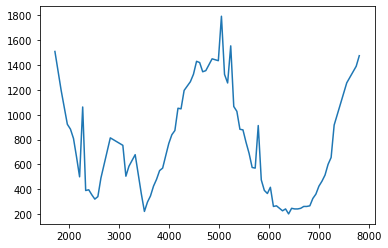

In [5]:
measurement = np.loadtxt('example data cleaning.txt', dtype=int)
timestamp = measurement[:, 0]
echo = measurement[:, 1]
good_readings = echo > 0
timestamp = timestamp[good_readings]
echo = echo[good_readings]
plt.plot(timestamp, echo)
plt.show()

You can see there are still some strange jumps happening in the data. We should be able to identify them as the points with a very high derivative -- or even better, a very small second derivative. Let's plot the derivative and second derivative using the function you wrote last time.

In [6]:
from derivative import symmetric_difference

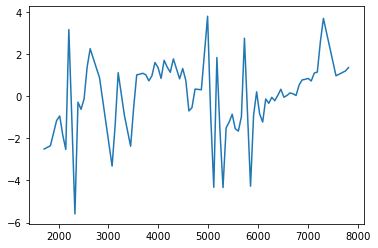

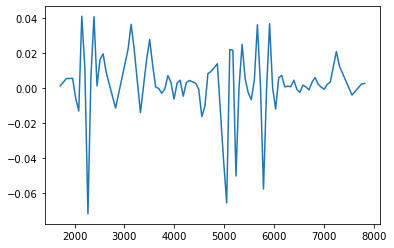

In [7]:
first_derivative = symmetric_difference(timestamp, echo)
second_derivative = symmetric_difference(timestamp, first_derivative)
plt.plot(timestamp, first_derivative)
plt.show()
plt.plot(timestamp, second_derivative)
plt.show()

We can see four big spikes in the second derivative, right where we saw those spikes in the original graph.

<h3 style="color:red;"><left> Exercise 5 (5 pts)</left></h3>

Explain why a sharp vertical spike in the original function corresponds to a large but negative second derivative.

<h3 style="background-color:lightblue"><left> Write Answer for Exercise 5 Below </left></h3>

We can use that to filter our measurement, and get a better graph of position and velocity. Notice that we need to recompute the derivative, since we used the neighbors of each point to compute the derivative.

In [8]:
spikes = second_derivative < -0.02
timestamp = timestamp[~spikes]
echo = echo[~spikes]

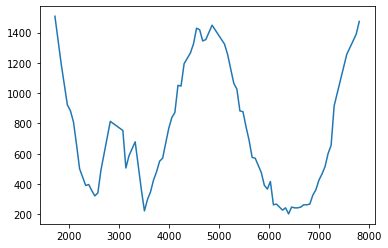

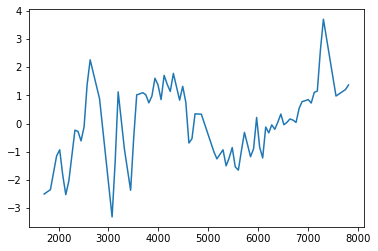

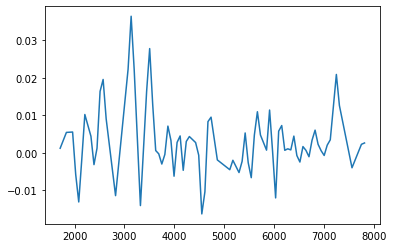

In [9]:
first_derivative = symmetric_difference(timestamp, echo)
second_derivative = symmetric_difference(timestamp, first_derivative)
for curve in [echo, first_derivative, second_derivative]:
    plt.plot(timestamp, curve)
    plt.show()

<h3 style="color:red;"><left> Exercise 6 (5 pts)</left></h3>

The time stamp is measured in milliseconds. In the example above I ignored the units for distance, but you can use the speed-of-sound formula you applied above to scale your distance values appropriately. Given the units you used for distance, what should the units for velocity be? What about acceleration? Explain your answer in at least two sentences.

<h3 style="background-color:lightblue"><left> Write Answer for Exercise 6 Below </left></h3>

<h3 style="color:red;"><left> Exercise 7 (10 pts)</left></h3>

Repeat this procedure using your own measurement, first scaling the echo to give units of distance. If you have any "spikes" as I did, choose an appropriate cutoff for the second derivative to remove them. Produce plots of the function value, first derivative, and second derivative. Put axis labels on your plots including units

<h3 style="background-color:lightblue"><left> Write Answer for Exercise 7 Below </left></h3>

<h3 style="color:red;"><left> Exercise 8 (10 pts)</left></h3>

For each curve below, produce a plot of the same shape by moving an object in front of the ultrasonic distance sensor. You can change the scale by adjusting the x and y limits on your plot. Try and get it as close as you can, but don't spend too long on this -- as long as the shape is close, you will receive full credit.

![part 1](exercise_8_0.png)
![part 2](exercise_8_1.png)
![part 3](exercise_8_2.png)

<h3 style="background-color:lightblue"><left> Write Answer for Exercise 8 Below </left></h3>

<h3 style="color:red;"><left> Exercise 9 (5 pts)</left></h3>

Choose one of the curves from exercise 8. Move an object in front of the sensor to make the same curve, but using the plot of the derivative this time.

<h3 style="background-color:lightblue"><left> Write Answer for Exercise 9 Below </left></h3>

<h3 style="color:red;"><left> Exercise 10 (10 pts)</left></h3>

Load up a measurement you took using the heart rate monitor. Try your symmetric difference formula on it. Compare that to the result you got from taking the derivative of the interpolating polynomial. Which method do you think gave a better result? Explain your choice in 3-5 sentences.

<h3 style="background-color:lightblue"><left> Write Answer for Exercise 10 Below </left></h3>

<h3 style="color:red;"><left> Exercise 11 (35 pts)</left></h3>

Get one of the heart rate sensors. Working with a partner, figure out a procedure to answer each of these questions:

1. If you jog up and down the hallway briefly, how does your pulse rate change?
2. If you measure your systolic amplitude with your finger above your shoulders versus below your waist, can you detect a difference? How big is the difference? Is there anything else which may be affecting this?
3. Is your ratio b/a different from your classmates'? Does this ratio change depending on your heart rate / posture / other variables?

You will be graded on the following rubric:

**Score**                | **7 pts** | **4 pts** | **1 pt**
-------------------------|-----------|--------------|------------
Choice of strategy       | The method chosen is well-suited to the question. | The method for answering at least one question has a major source of error which was not accounted for. | None of the strategies were well-suited to the question posed.
Description of procedure | The procedure was explained thoroughly enough that another student in this class could easily replicate what you did. | I can tell what you did, but some parts were unclear. Or, it is not explained at the level where another student would be able to follow it. | It is not clear what steps you took or how you acquired your data.
Explanation of theory    | The theory behind what you are doing is explained so that a calculus 2 student who has not taken this course would be able to understand your computations. | There is some explanation of the theory behind what you are doing, but it would be hard to follow for someone who is not currently taking this class. | The theory is described incorrectly.
Presentation             | The results are shared using informative plots with clear labels. All figures have accompanying text indicating what they show. | The results are described well, but some of the figures are hard to interpret. | It is not clear what the answer to each question is.
Good coding practice     | Code is organized into blocks for clarity. If something unusual is being done, there is a comment giving some context. Formatting is consistent. Functions are used where appropriate. | Code is clear enough, but has inconsistent formatting or excessive commenting. There are multiple places where a function would be appropriate to organize the code, but functions are not used. | It is unclear what the code is doing in several places. It is not clear that the code does what is intended. Formatting makes the code hard to read.

You don't have to turn in all the code you use -- in particular, it would be a good idea to collect your data in a separate document. This document should have a clear description of what you did in other documents, though, and you should present your findings here. It's okay if you and your partner write the same thing for this exercise. You should work together. Be creative -- it's okay to share inconclusive results, as long as you describe in detail why your findings are inconclusive.

**Write the name of your lab partner here:**

<h3 style="background-color:lightblue"><left> Write Answer for Exercise 11 Below </left></h3>